In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.6 MB 11.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.6 MB 7.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/9.6 MB 5.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 4.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.6 MB 4.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 3.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 2.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 2.6 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 2.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.6 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.6 MB 2.3 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.6 MB 2.1 MB/s eta 0:00:03
   ---------------

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

In [8]:
import numpy as np

In [11]:
import seaborn as sns

In [9]:
#data sample "Статистические данные о занятости и безработице среди населения по возрастным группам". 
#Источник: Росстат; обработка: Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2020. (Ссылка на набор данных: http://data.rcsi.science/data-catalog/datasets/156/)
file_path = '4python_data.xlsx'  
df = pd.read_excel(file_path)

In [ ]:
# Preview data
#print(df.head())

# 1. Summary statistics for unemployment by age groups
age_unemp_cols = [
    'num_unagegroup_to20', 'num_unagegroup_20-29', 'num_unagegroup_30-39','num_unagegroup_40-49', 'num_unagegroup_50-59', 'num_unagegroup_60older'
]
print(df[age_unemp_cols].describe())

# 2. Correlation matrix between age group unemployment numbers and overall unemployment level
correlation_data = df[age_unemp_cols + ['unemployment_lvl']]
corr_matrix = correlation_data.corr()
print(corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Age Group Unemployment & Overall Unemployment Level")
plt.show()

# 3. Trend of unemployment level over years - aggregated over all regions
yearly_trend = df.groupby('year')['unemployment_lvl'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='year', y='unemployment_lvl', marker='o')
plt.title('Average Unemployment Level Over Years in Russia')
plt.ylabel('Average Unemployment Level')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# 4. Regional comparison: Top 5 regions with highest average unemployment level over all years
avg_unemp_by_region = df.groupby('territory')['unemployment_lvl'].mean().sort_values(ascending=False).head(5)
print("Top 5 regions by average unemployment level:")
print(avg_unemp_by_region)
#due to this analysis we found errors in data for Alania in 2007, will fix it and update
# Barplot of top 5 regions unemployment level over years
top_regions = avg_unemp_by_region.index.tolist()
df_top_regions = df[df['territory'].isin(top_regions)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_regions, x='year', y='unemployment_lvl', hue='territory', marker='o')
plt.title('Unemployment Level Over Time for Top 5 Regions')
plt.ylabel('Unemployment Level')
plt.xlabel('Year')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# 5. Age group unemployment shares over time - Stacked area chart
df_age_group_sums = df.groupby('year')[age_unemp_cols].sum()
df_age_group_shares = df_age_group_sums.div(df_age_group_sums.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))
df_age_group_shares.plot.area()
plt.title('Share of Unemployed by Age Group Over Years')
plt.ylabel('Share of Total Unemployed')
plt.xlabel('Year')
plt.legend(title='Age Groups')
plt.grid(True)
plt.show()

       num_unagegroup_to20  num_unagegroup_20-29  num_unagegroup_30-39  \
count           750.000000            751.000000            751.000000   
mean              3.762533             19.970040             13.151664   
std               4.754709             17.148095             10.930016   
min               0.000000              0.300000              0.200000   
25%               0.800000              8.000000              5.750000   
50%               2.000000             14.100000              9.600000   
75%               4.800000             27.500000             18.000000   
max              33.500000            121.300000             80.100000   

       num_unagegroup_40-49  num_unagegroup_50-59  num_unagegroup_60older  
count            751.000000            751.000000              739.000000  
mean              11.684554              8.105992                1.449120  
std                9.794791              6.050636                1.617329  
min                0.100000  

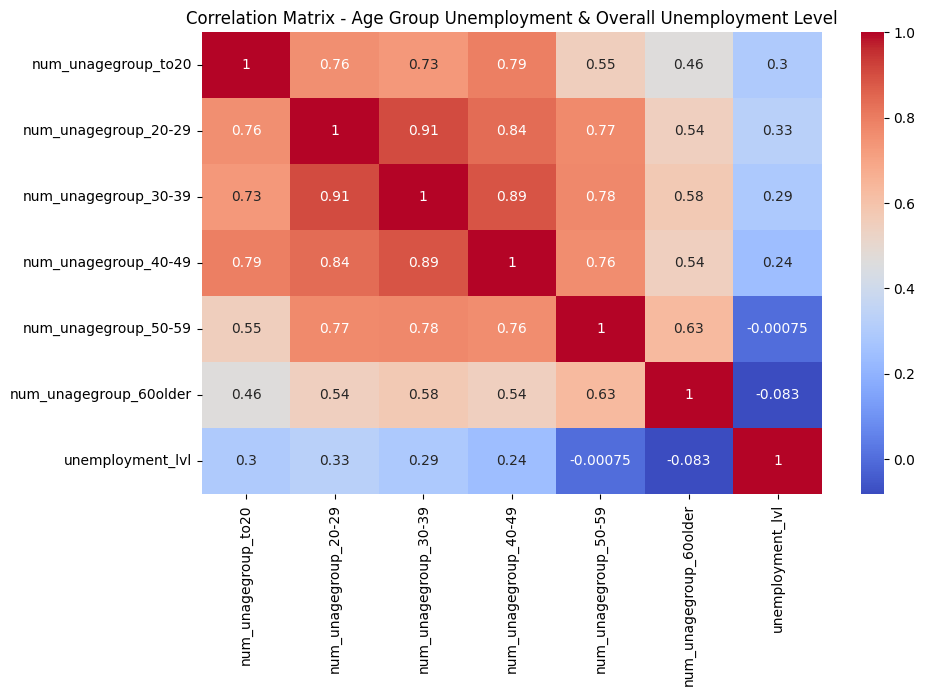

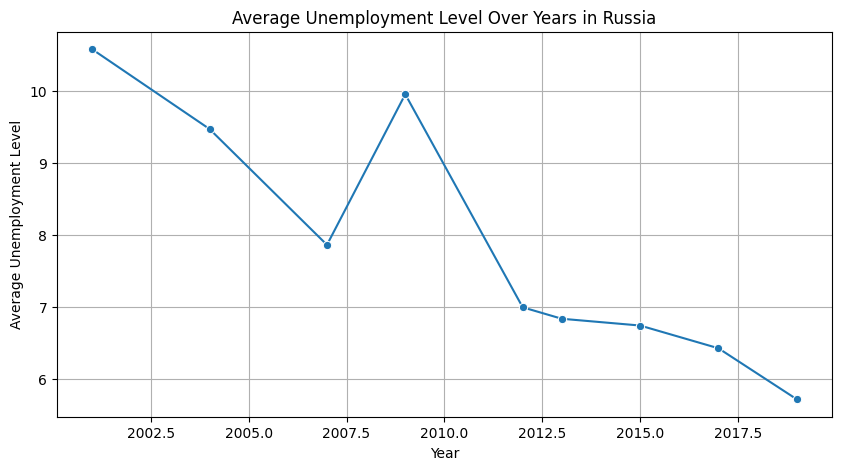

Top 5 regions by average unemployment level:
territory
Республика Ингушетия    39.633333
Чеченская Республика    27.042857
Республика Тыва         18.788889
Республика Дагестан     16.500000
Республика Калмыкия     14.144444
Name: unemployment_lvl, dtype: float64


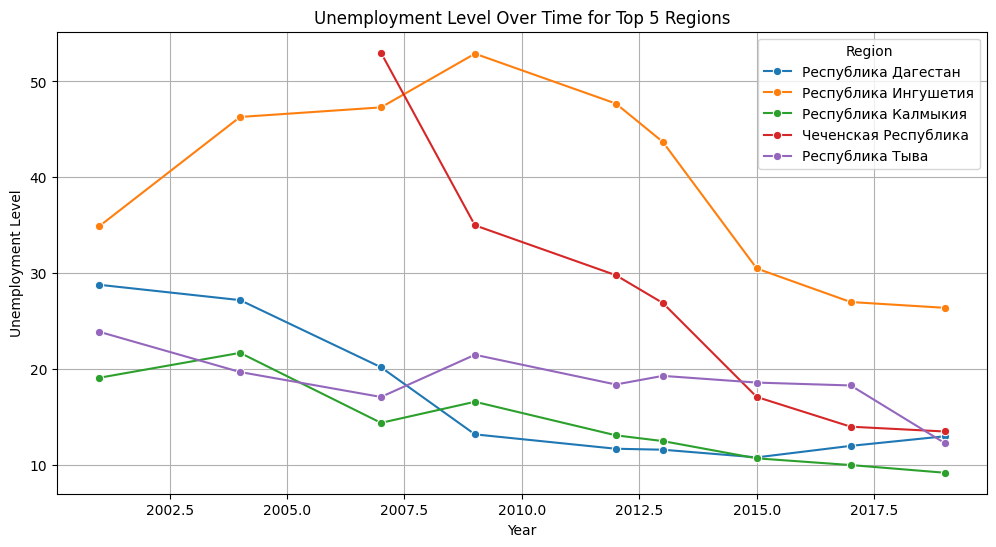

<Figure size 1200x700 with 0 Axes>

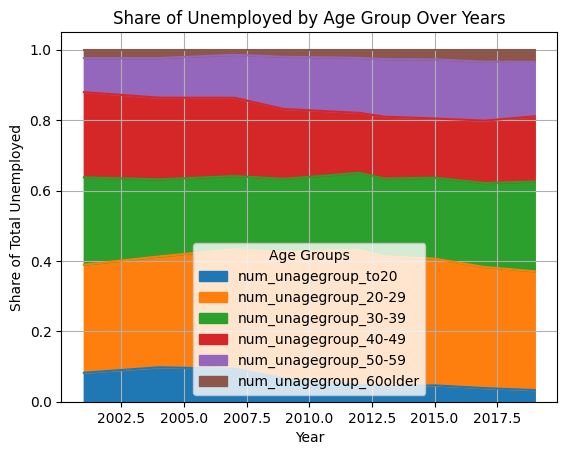

In [12]:
#previous analysis shows that data for Republic of Alania in 2007 are corrupted, so we fix the data errors and reporform the analysis on the new data file
# update data source
file_path = '4python_data_upd.xlsx'  
df1 = pd.read_excel(file_path)
#print(df.head())

# 1. Summary statistics for unemployment by age groups
age_unemp_cols = [
    'num_unagegroup_to20', 'num_unagegroup_20-29', 'num_unagegroup_30-39','num_unagegroup_40-49', 'num_unagegroup_50-59', 'num_unagegroup_60older'
]
print(df1[age_unemp_cols].describe())

# 2. Correlation matrix between age group unemployment numbers and overall unemployment level
correlation_data = df1[age_unemp_cols + ['unemployment_lvl']]
corr_matrix = correlation_data.corr()
print(corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Age Group Unemployment & Overall Unemployment Level")
plt.show()

# 3. Trend of unemployment level over years - aggregated over all regions
yearly_trend = df1.groupby('year')['unemployment_lvl'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='year', y='unemployment_lvl', marker='o')
plt.title('Average Unemployment Level Over Years in Russia')
plt.ylabel('Average Unemployment Level')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# 4. Regional comparison: Top 5 regions with highest average unemployment level over all years
avg_unemp_by_region = df1.groupby('territory')['unemployment_lvl'].mean().sort_values(ascending=False).head(5)
print("Top 5 regions by average unemployment level:")
print(avg_unemp_by_region)
#due to this analysis we found errors in data for Alania in 2007, will fix it and update
# Barplot of top 5 regions unemployment level over years
top_regions = avg_unemp_by_region.index.tolist()
df_top_regions = df1[df1['territory'].isin(top_regions)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_regions, x='year', y='unemployment_lvl', hue='territory', marker='o')
plt.title('Unemployment Level Over Time for Top 5 Regions')
plt.ylabel('Unemployment Level')
plt.xlabel('Year')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# 5. Age group unemployment shares over time - Stacked area chart
df_age_group_sums = df1.groupby('year')[age_unemp_cols].sum()
df_age_group_shares = df_age_group_sums.div(df_age_group_sums.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))
df_age_group_shares.plot.area()
plt.title('Share of Unemployed by Age Group Over Years')
plt.ylabel('Share of Total Unemployed')
plt.xlabel('Year')
plt.legend(title='Age Groups')
plt.grid(True)
plt.show()

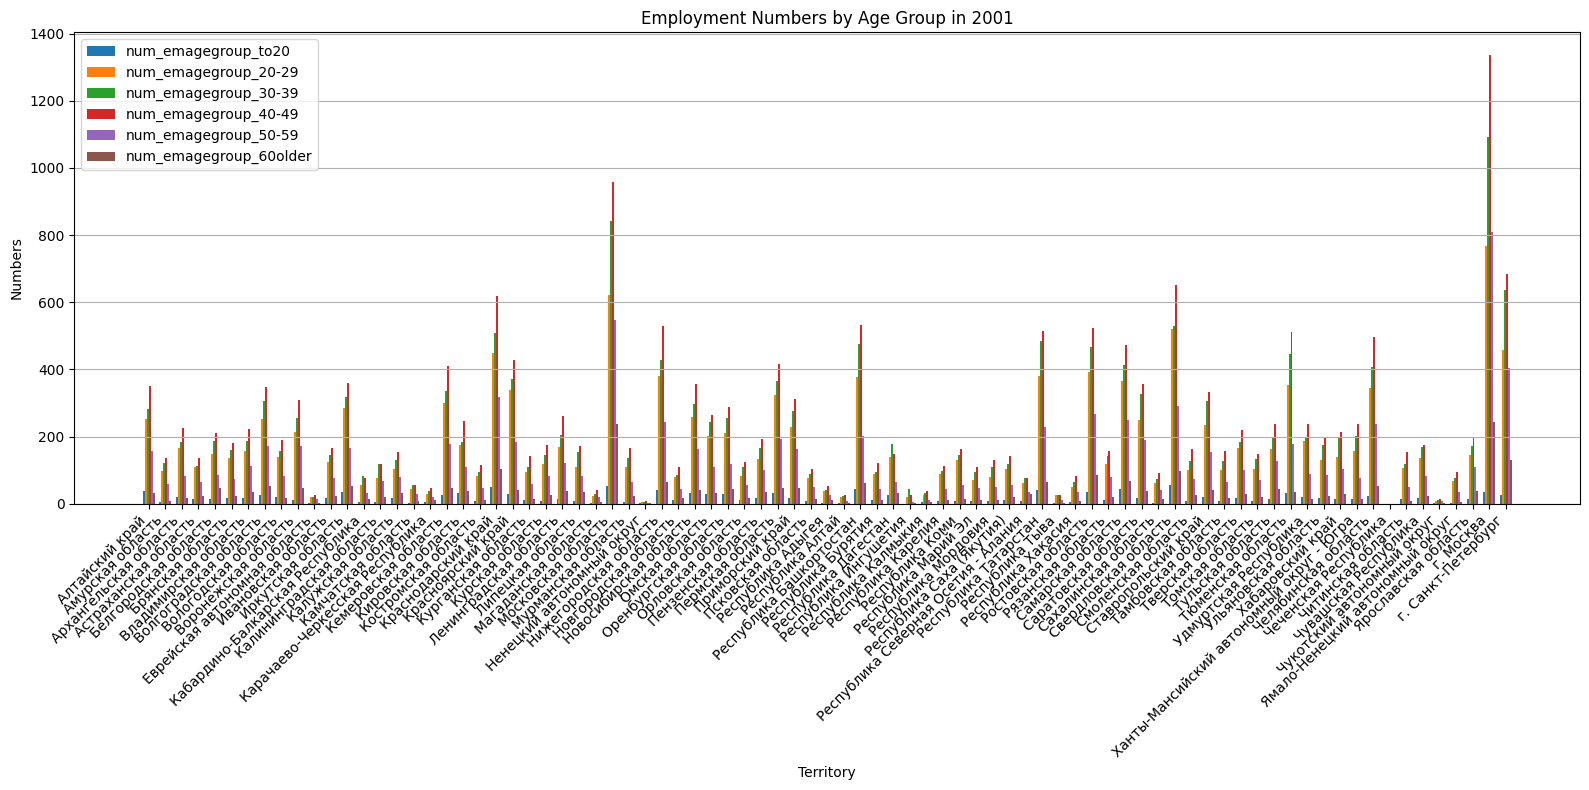

In [13]:
#visualize data for 2001
df_2001 = df1[df1['year'] == 2001]

# Group by territory and sum values
df_grouped = df_2001.groupby('territory').sum()

# Rename territories to English names (example)
#translation = {
   # 'region1': 'Region 1',
   # 'region2': 'Region 2',
   # 'region3': 'Region 3'
#}
#df_grouped.index = df_grouped.index.map(translation)

# Columns to plot
cols = ['num_emagegroup_to20', 'num_emagegroup_20-29', 'num_emagegroup_30-39',
        'num_emagegroup_40-49', 'num_emagegroup_50-59', 'num_emagegroup_60older']

# Plotting bar chart
plt.figure(figsize=(16, 8))  # Wide figure

bar_width = 0.12  # Width of each bar
x = range(len(df_grouped))

for i, col in enumerate(cols):
    plt.bar([pos + i * bar_width for pos in x], df_grouped[col], width=bar_width, label=col)

plt.xlabel('Territory')
plt.ylabel('Numbers')
plt.title('Employment Numbers by Age Group in 2001')
plt.xticks([pos + 2.5 * bar_width for pos in x], df_grouped.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

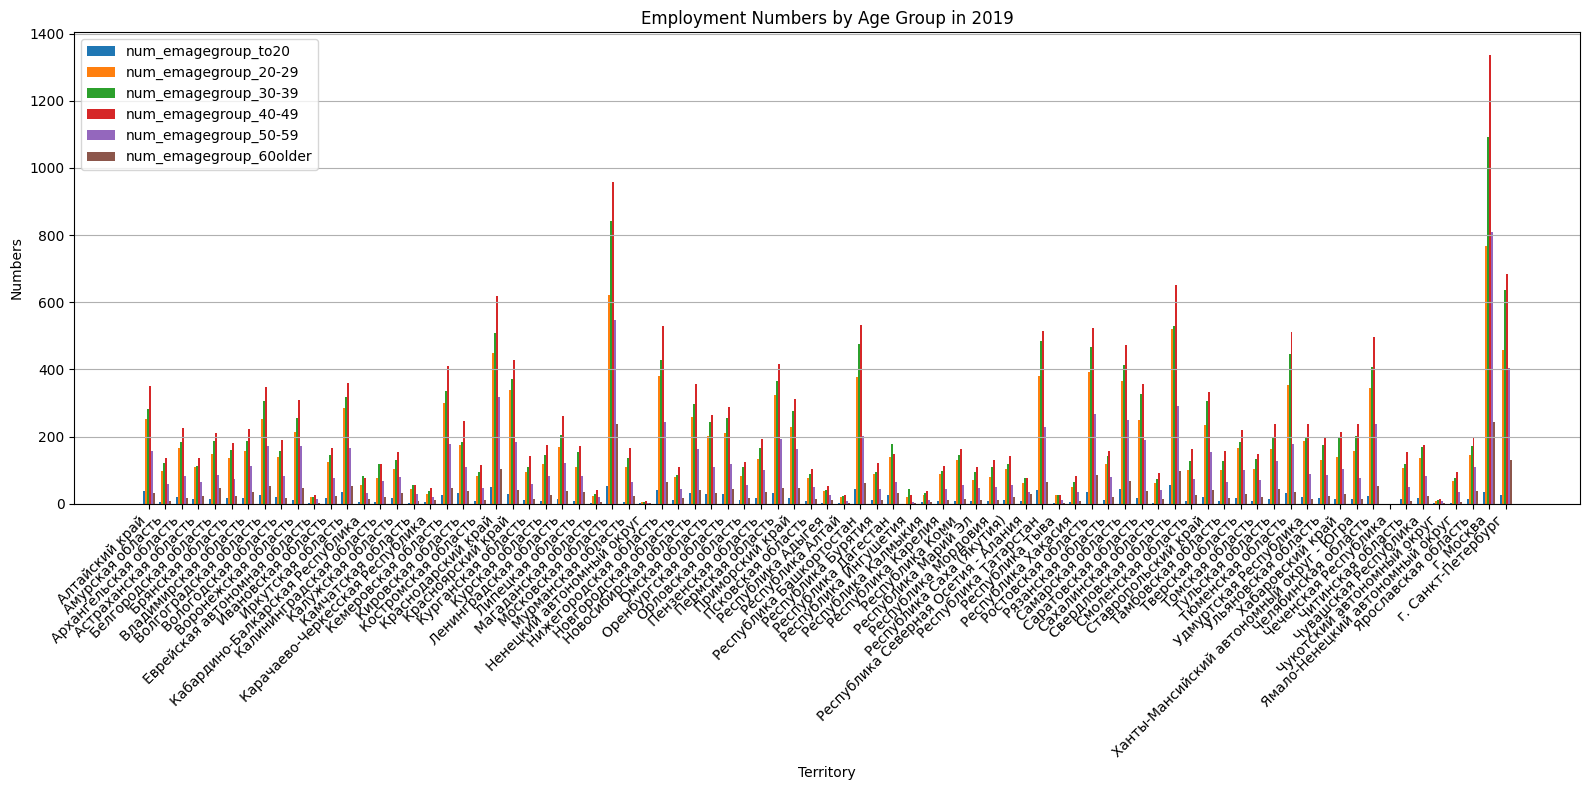

In [14]:
#visualize data for 2019
df_2019 = df1[df1['year'] == 2019]

# Group by territory and sum values
df_grouped1 = df_2019.groupby('territory').sum()

# Rename territories to English names (example)
#translation = {
   # 'region1': 'Region 1',
   # 'region2': 'Region 2',
   # 'region3': 'Region 3'
#}
#df_grouped.index = df_grouped.index.map(translation)

# Columns to plot
cols = ['num_emagegroup_to20', 'num_emagegroup_20-29', 'num_emagegroup_30-39',
        'num_emagegroup_40-49', 'num_emagegroup_50-59', 'num_emagegroup_60older']

# Plotting bar chart
plt.figure(figsize=(16, 8))  # Wide figure

bar_width = 0.12  # Width of each bar
x = range(len(df_grouped))

for i, col in enumerate(cols):
    plt.bar([pos + i * bar_width for pos in x], df_grouped[col], width=bar_width, label=col)

plt.xlabel('Territory')
plt.ylabel('Numbers')
plt.title('Employment Numbers by Age Group in 2019')
plt.xticks([pos + 2.5 * bar_width for pos in x], df_grouped.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
import statsmodels.formula.api as smf

# Load and clean data
#df = pd.read_excel("4python_data_upd.xlsx", sheet_name="Лист1")

# Filter out rows with missing territory or year
df = df.dropna(subset=['territory', 'year'])

# Compute total unemployed and unemployment rate
df['unemployment_rate'] = df['unemployed_num_all'] / df['num_economactivepopulation_all'] * 100

# Compute age group shares of unemployed
age_cols_un = [
    'num_unagegroup_to20', 'num_unagegroup_20-29', 'num_unagegroup_30-39',
    'num_unagegroup_40-49', 'num_unagegroup_50-59', 'num_unagegroup_60older'
]
df['unemployed_youth'] = df[['num_unagegroup_to20', 'num_unagegroup_20-29']].sum(axis=1)
df['unemployed_older'] = df[['num_unagegroup_50-59', 'num_unagegroup_60older']].sum(axis=1)

# Avoid division by zero
df = df[df['unemployed_num_all'] > 0]

df['youth_share'] = df['unemployed_youth'] / df['unemployed_num_all']
df['older_share'] = df['unemployed_older'] / df['unemployed_num_all']

# Panel regression
model = smf.ols(
    formula='unemployment_rate ~ youth_share + older_share + C(territory) + C(year)',
    data=df
).fit(cov_type='HC1')  # Robust standard errors

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     27.22
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          4.45e-174
Time:                        22:40:26   Log-Likelihood:                -1622.3
No. Observations:                 751   AIC:                             3441.
Df Residuals:                     653   BIC:                             3893.
Df Model:                          97                                         
Covariance Type:                  HC1                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

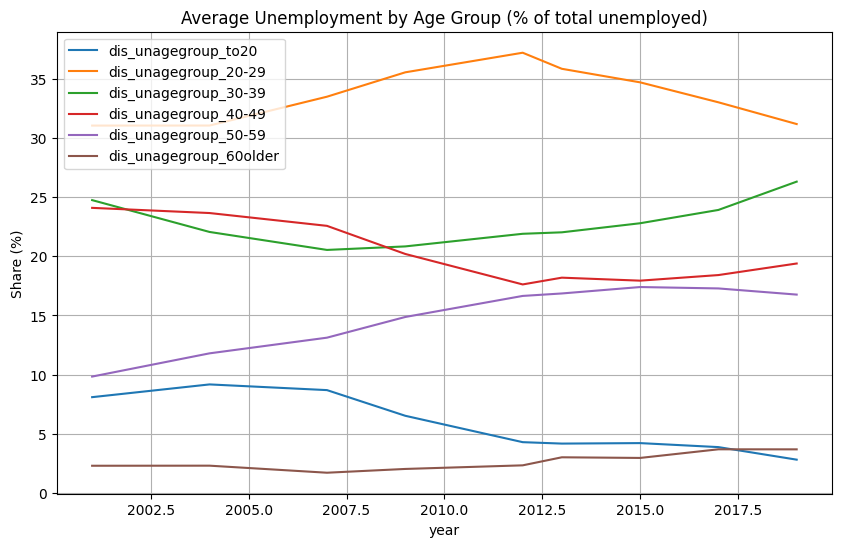

                               territory   youth_ur
706                 Республика Ингушетия  13.843774
710                 Чеченская Республика   7.187894
705                  Республика Дагестан   6.931481
733                      Республика Тыва   3.934987
709  Республика Северная Осетия - Алания   3.764479
708      Карачаево-Черкесская Республика   3.388998
744                   Забайкальский край   3.330796
707      Кабардино-Балкарская Республика   3.293011
701                 Астраханская область   3.254438
732                     Республика Алтай   2.947368
                               territory    old_ur
709  Республика Северная Осетия - Алания  3.056628
710                 Чеченская Республика  2.443253
708      Карачаево-Черкесская Республика  2.259332
707      Кабардино-Балкарская Республика  2.195341
749                  Магаданская область  2.097902
698                  Республика Калмыкия  2.033133
701                 Астраханская область  2.011834
732                 

In [22]:
# Time trends in age shares
plt.figure(figsize=(10,6))
for col in ['dis_unagegroup_to20', 'dis_unagegroup_20-29', 'dis_unagegroup_30-39', 'dis_unagegroup_40-49', 'dis_unagegroup_50-59', 'dis_unagegroup_60older'
]:
    df.groupby('year')[col].mean().plot(label=col)
plt.title('Average Unemployment by Age Group (% of total unemployed)')
plt.ylabel('Share (%)')
plt.legend()
plt.grid(True)
plt.show()

# Regional variation in youth unemployment (2019)
df_2019 = df[df['year'] == 2019].copy()
df_2019['youth_ur'] = df_2019['unemployed_youth'] / df_2019['num_economactivepopulation_all'] * 100
top10 = df_2019.nlargest(10, 'youth_ur')[['territory', 'youth_ur']]
print(top10)

# Regional variation in old unemployment (2019)
df_2019 = df[df['year'] == 2019].copy()
df_2019['old_ur'] = df_2019['unemployed_older'] / df_2019['num_economactivepopulation_all'] * 100
top10 = df_2019.nlargest(10, 'old_ur')[['territory', 'old_ur']]
print(top10)

In [23]:
# Load and clean
df = pd.read_excel("4python_data_upd.xlsx", sheet_name="Лист1")
df = df.dropna(subset=['territory', 'year', 'unemployed_num_all'])
df = df[df['unemployed_num_all'] > 0]

# Create key variables
df['unemployment_rate'] = df['unemployed_num_all'] / df['num_economactivepopulation_all'] * 100
df['youth_share'] = (df['num_unagegroup_to20'] + df['num_unagegroup_20-29']) / df['unemployed_num_all']
df['older_share'] = (df['num_unagegroup_50-59'] + df['num_unagegroup_60older']) / df['unemployed_num_all']
df['share_50_59'] = df['num_unagegroup_50-59'] / df['unemployed_num_all']
df['share_60plus'] = df['num_unagegroup_60older'] / df['unemployed_num_all']

# Model A: Youth vs Older
model_a = smf.ols('unemployment_rate ~ youth_share + older_share + C(territory) + C(year)', data=df).fit(cov_type='HC1')

# Model B: Disaggregated older groups
model_b = smf.ols('unemployment_rate ~ share_50_59 + share_60plus + C(territory) + C(year)', data=df).fit(cov_type='HC1')

print("=== Model A ===")
print(model_a.summary().tables[1])
print("\n=== Model B ===")
print(model_b.summary().tables[1])

=== Model A ===
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   12.3830      1.145     10.818      0.000      10.139      14.627
C(territory)[T.Амурская область]                            -0.5013      0.648     -0.773      0.439      -1.772       0.769
C(territory)[T.Архангельская область]                       -1.3143      0.588     -2.235      0.025      -2.467      -0.162
C(territory)[T.Астраханская область]                         0.8239      0.516      1.595      0.111      -0.188       1.836
C(territory)[T.Белгородская область]                        -3.3515      0.560     -5.987      0.000      -4.449      -2.254
C(territory)[T.Брянская область]                            -1.4701      0.537     -2.738      0.006      -2.

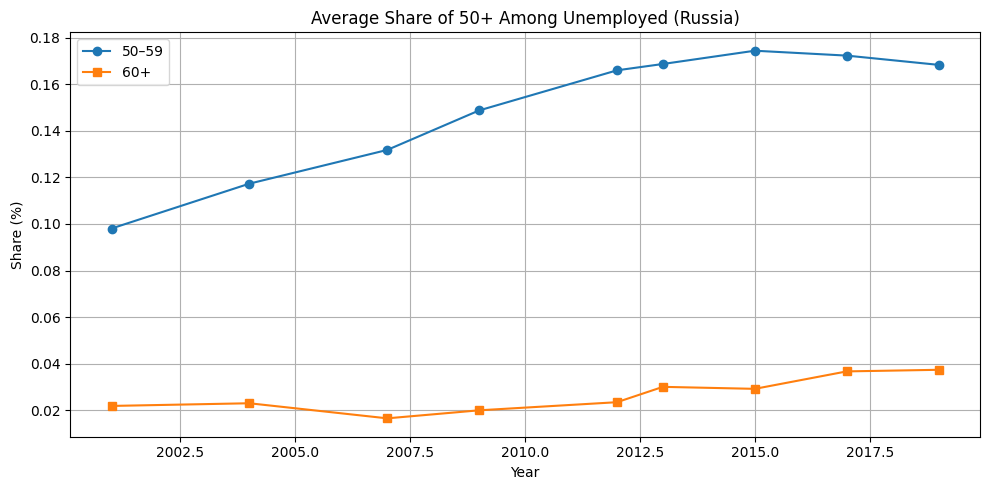

In [24]:

plt.figure(figsize=(10, 5))
df.groupby('year')['share_50_59'].mean().plot(label='50–59', marker='o')
df.groupby('year')['share_60plus'].mean().plot(label='60+', marker='s')
plt.title('Average Share of 50+ Among Unemployed (Russia)')
plt.ylabel('Share (%)')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('trend_50plus.png', dpi=300)
plt.show()

C:\Users\jzakharova\AppData\Local\Temp\ipykernel_19540\2319794128.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='territory', x='ur_50plus', palette='viridis')


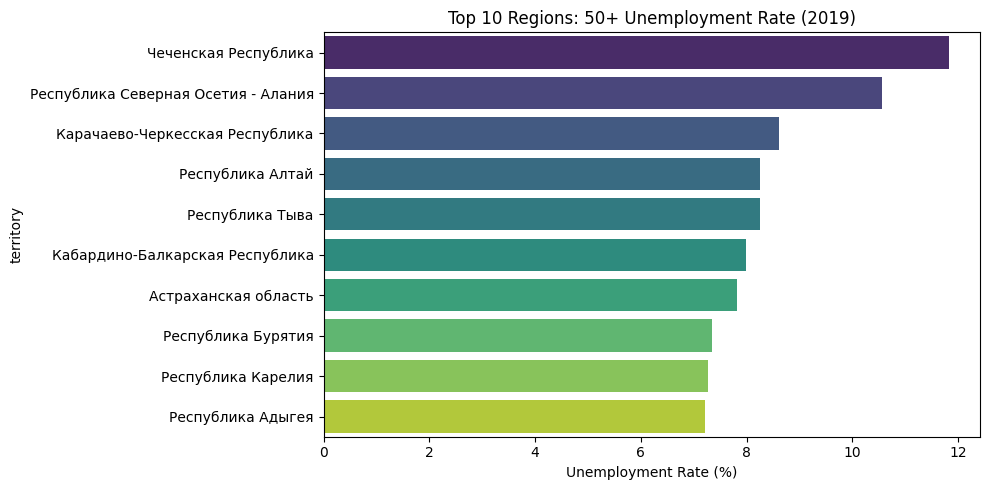

In [25]:
df_2019 = df[df['year'] == 2019].copy()
df_2019['ur_50plus'] = (
    (df_2019['num_unagegroup_50-59'] + df_2019['num_unagegroup_60older']) /
    (df_2019['num_emagegroup_50-59'] + df_2019['num_emagegroup_60older'] +
     df_2019['num_unagegroup_50-59'] + df_2019['num_unagegroup_60older'])
) * 100

top10 = df_2019.nlargest(10, 'ur_50plus')[['territory', 'ur_50plus']]

plt.figure(figsize=(10, 5))
sns.barplot(data=top10, y='territory', x='ur_50plus', palette='viridis')
plt.title('Top 10 Regions: 50+ Unemployment Rate (2019)')
plt.xlabel('Unemployment Rate (%)')
plt.tight_layout()
plt.savefig('top10_50plus_2019.png', dpi=300)
plt.show()